In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [149]:
data=pd.read_csv('state_pop_by_age_gender.csv')
print(data)

       state state_abbr gender_group age_group  population
0    Alabama         AL       Female       <18      536918
1    Alabama         AL       Female       18+     1979977
2    Alabama         AL       Female       All     2516895
3    Alabama         AL         Male       <18      559458
4    Alabama         AL         Male       18+     1799897
..       ...        ...          ...       ...         ...
472  Wyoming         WY         Male       18+      225899
473  Wyoming         WY         Male       All      296202
474  Wyoming         WY         Both       <18      136371
475  Wyoming         WY         Both       18+      444653
476  Wyoming         WY         Both       All      581024

[477 rows x 5 columns]


In [150]:
data.shape

(477, 5)

In [151]:
data.describe()

,population
count,4.770000e+02
mean,5.473493e+06
std,2.329765e+07
min,5.655500e+04
25%,5.617490e+05
50%,1.450697e+06
75%,3.526346e+06
max,3.246978e+08


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         477 non-null    object
 1   state_abbr    477 non-null    object
 2   gender_group  477 non-null    object
 3   age_group     477 non-null    object
 4   population    477 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 18.8+ KB


In [153]:
data.value_counts
data.drop_duplicates(subset=['state', 'gender_group', 'age_group'], keep='first', inplace=True)

In [154]:
data.isnull()

,state,state_abbr,gender_group,age_group,population
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
472,False,False,False,False,False
473,False,False,False,False,False
474,False,False,False,False,False
475,False,False,False,False,False


In [155]:
data.isnull().sum()

state           0
state_abbr      0
gender_group    0
age_group       0
population      0
dtype: int64

In [156]:
# drop state_abbr
data.drop('state_abbr', inplace=True, axis=1)
print(data.columns)

Index(['state', 'gender_group', 'age_group', 'population'], dtype='object')


In [157]:
total_data=data

# Sort data based on the total population
total_data_sort=total_data.sort_values(by='population', ascending = False)

# Get the top ten countries of total population for 2022
total_data_top=total_data_sort.head(10)
print(total_data_top)

                             state gender_group age_group  population
404  United States (States and DC)         Both       All   324697795
403  United States (States and DC)         Both       18+   251268403
398  United States (States and DC)       Female       All   164810876
401  United States (States and DC)         Male       All   159886919
397  United States (States and DC)       Female       18+   128908018
400  United States (States and DC)         Male       18+   122360385
402  United States (States and DC)         Both       <18    73429392
44                      California         Both       All    39283497
399  United States (States and DC)         Male       <18    37526534
396  United States (States and DC)       Female       <18    35902858


In [158]:
male_data=data[data['gender_group']=='Male']
male_data_sort=male_data.sort_values(by='population', ascending=False)
male_data_top=male_data_sort.head(10)
male_data_top

,state,gender_group,age_group,population
401,United States (States and DC),Male,All,159886919
400,United States (States and DC),Male,18+,122360385
399,United States (States and DC),Male,<18,37526534
41,California,Male,All,19526298
40,California,Male,18+,14915402
392,Texas,Male,All,14034009
391,Texas,Male,18+,10292114
77,Florida,Male,All,10220813
284,New York,Male,All,9501001
76,Florida,Male,18+,8084189


In [159]:
female_data=data[data['gender_group']=='Female']
female_data_sort=female_data.sort_values(by='population', ascending=True)
female_data_top=female_data_sort.head(5)
female_data_top

,state,gender_group,age_group,population
414,Vermont,Female,<18,56555
441,"Washington, DC",Female,<18,61308
468,Wyoming,Female,<18,66068
297,North Dakota,Female,<18,85612
9,Alaska,Female,<18,89435


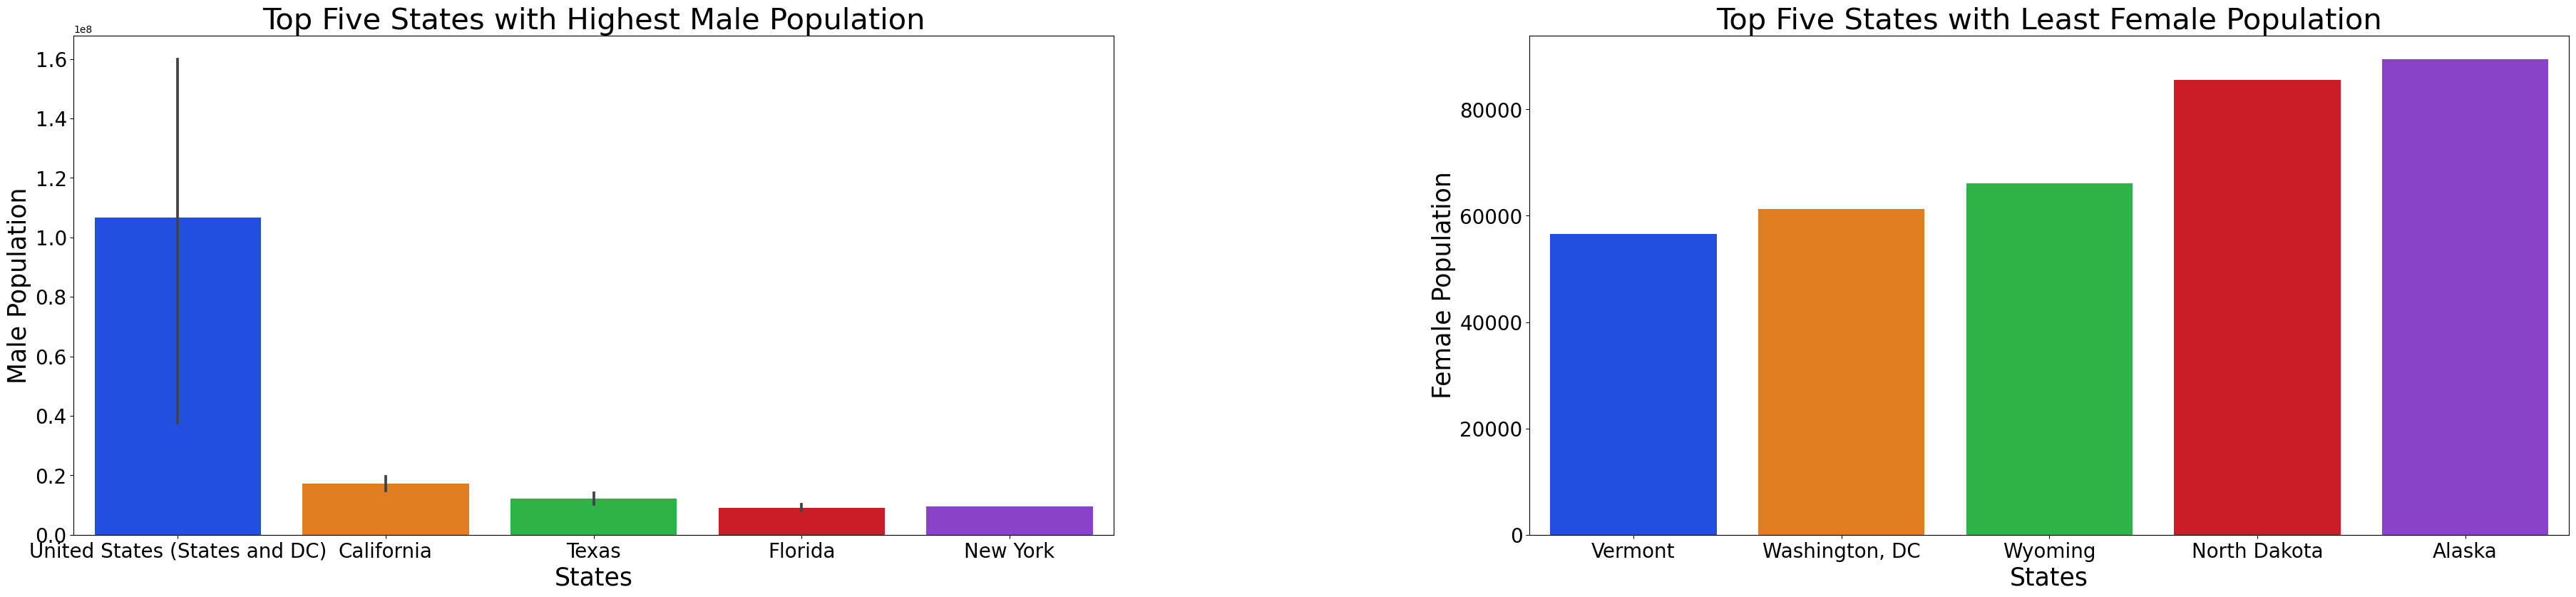

In [160]:
plt.figure(figsize=(50,10))
plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
#male
plt.subplot(1,2,1)
plt.title('Top Five States with Highest Male Population' , size = 30)
sns.barplot(x='state' , y='population' , data=male_data_top , palette='bright')
plt.xlabel('States' , size=25)
plt.ylabel('Male Population' , size=25)
plt.xticks(size=20)
plt.yticks(size=20)

#female
plt.subplot(1,2,2)
plt.title('Top Five States with Least Female Population' , size = 30)
sns.barplot(x='state' , y='population' , data=female_data_top , palette='bright')
plt.xlabel('States' , size=25)
plt.ylabel('Female Population' , size=25)
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

In [161]:
male_data_adult=data[data['age_group']=='<18']
male_data_adult_sort=male_data_adult.sort_values(by='population', ascending=False)
male_data_adult_top=male_data_adult_sort.head(10)
male_data_adult_top

,state,gender_group,age_group,population
402,United States (States and DC),Both,<18,73429392
399,United States (States and DC),Male,<18,37526534
396,United States (States and DC),Female,<18,35902858
42,California,Both,<18,9022146
393,Texas,Both,<18,7338445
39,California,Male,<18,4610896
36,California,Female,<18,4411250
78,Florida,Both,<18,4182462
285,New York,Both,<18,4108499
390,Texas,Male,<18,3741895


(array([       0., 10000000., 20000000., 30000000., 40000000., 50000000.,
        60000000., 70000000., 80000000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000000.0, '1'),
  Text(0, 20000000.0, '2'),
  Text(0, 30000000.0, '3'),
  Text(0, 40000000.0, '4'),
  Text(0, 50000000.0, '5'),
  Text(0, 60000000.0, '6'),
  Text(0, 70000000.0, '7'),
  Text(0, 80000000.0, '8')])

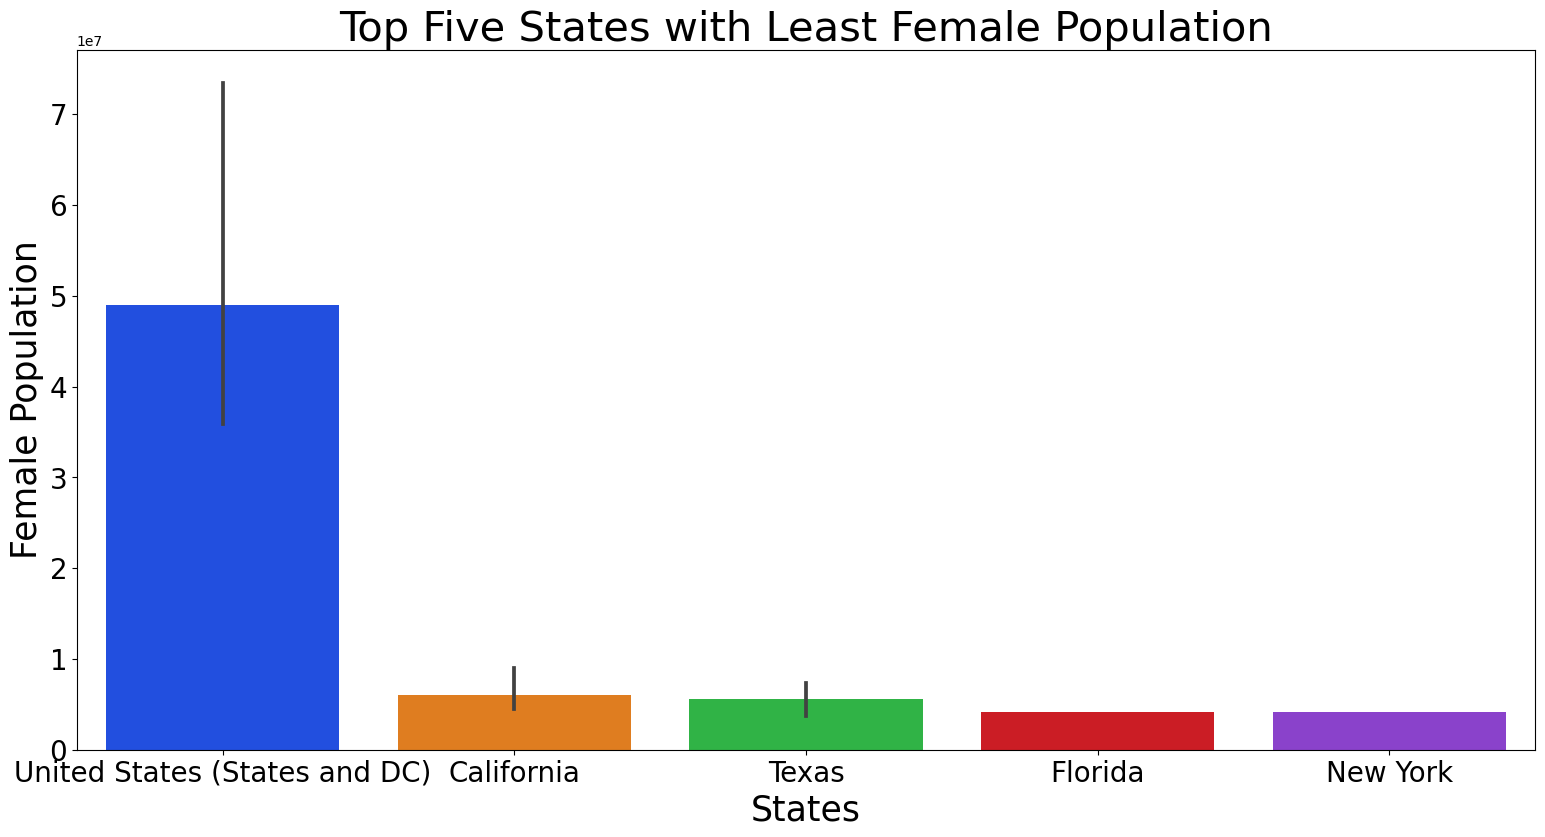

In [162]:
plt.figure(figsize=(50,10))
plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,2)
plt.title('Top Five States with Least Female Population' , size = 30)
sns.barplot(x='state' , y='population' , data=male_data_adult_top , palette='bright')
plt.xlabel('States' , size=25)
plt.ylabel('Female Population' , size=25)
plt.xticks(size=20)
plt.yticks(size=20)